### Exercise 05 - Linear regression with categorical variables and polynomial features

We first import required libraries.

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd

## Data
Given are (fictitious) employee data of a large company. Each row in this DataFrame corresponds to one employee. The following features are stored:
* ID: The personnel number
* YearsInCompany: For how many years has the person been working in the company?
* Department: In which department does the person work? Development, sales or administration?
* Performance: A measure that quantifies the performance of the employee (between 0 and 100)
* MonthsInCompany: How many months the person has been with the company
* Salary: The person's annual salary in EUR

We first read the data and display an extract.

In [198]:
df = pd.read_csv("../data/salary.csv")

df.describe()

,ID,YearsInCompany,Performance,MonthsInCompany,Salary
count,993.000000,993.000000,993.000000,993.000000,993.000000
mean,5002.056395,5.085498,63.997986,60.622356,70890.810675
std,2928.731721,4.739295,19.954585,56.862094,25593.321221
min,0.000000,0.000000,0.000000,0.000000,20861.000000
25%,2412.000000,1.500000,50.000000,18.000000,52922.000000
50%,5094.000000,3.700000,64.000000,44.000000,65479.000000
75%,7601.000000,7.300000,79.000000,87.000000,84110.000000
max,9993.000000,24.600000,100.000000,295.000000,191194.000000


In [199]:
df.head(10)

,ID,YearsInCompany,Department,Performance,MonthsInCompany,Salary
0,6252,7.6,Sales,63.0,91.0,90822.0
1,4684,0.1,Sales,70.0,1.0,90619.0
2,1731,4.6,Sales,52.0,55.0,83041.0
3,4742,5.9,Development,54.0,70.0,71367.0
4,4521,8.7,Sales,85.0,104.0,118978.0
5,6340,0.3,Sales,97.0,3.0,117619.0
6,576,3.3,Administration,51.0,39.0,67085.0
7,5202,3.8,Development,69.0,45.0,53044.0
8,6363,0.9,Administration,60.0,10.0,51902.0
9,439,1.9,Development,82.0,22.0,70778.0


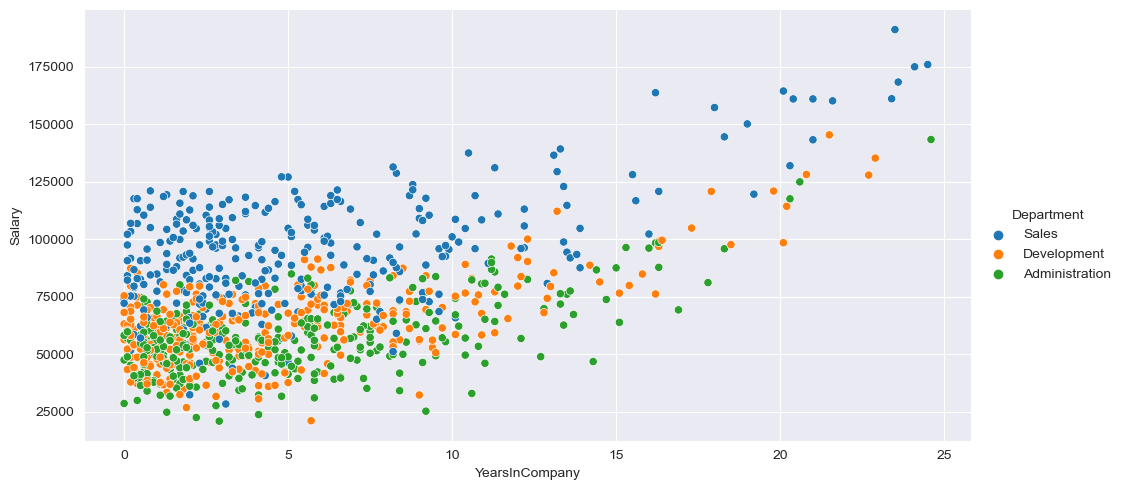

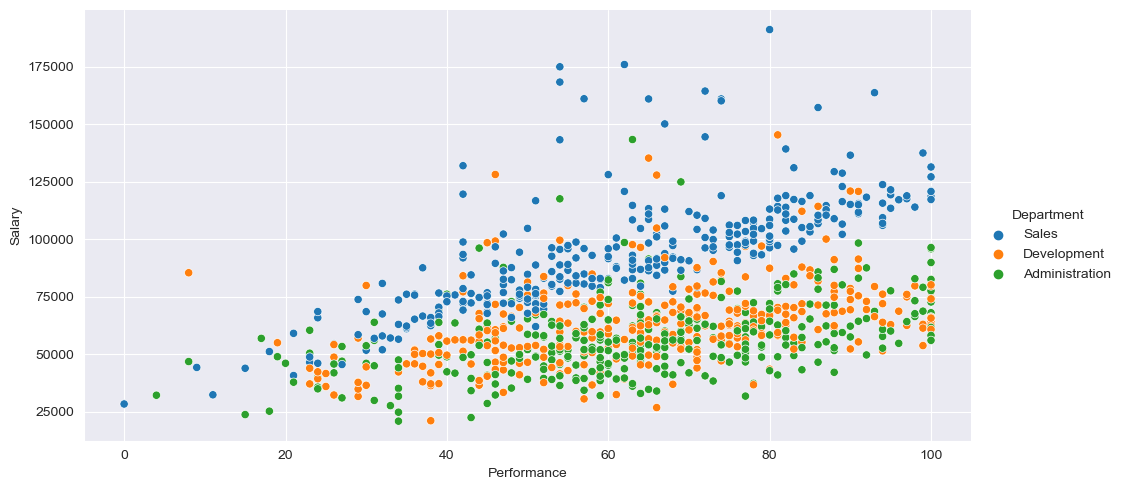

In [200]:
sns.relplot(data=df, x="YearsInCompany", y="Salary", hue="Department", aspect=2)
sns.relplot(data=df, x="Performance", y="Salary", hue="Department", aspect=2)

## Tasks 

In this exercise, you will train and evaluate various regression models that predict the annual salary (`salary`) for an employee.

### Task 1
Train a multiple linear regression on the features `YearsInCompany`, `Department` and `Performance`. Proceed as follows:
1. Convert the categorical feature `Department` to a numeric feature using one-hot encoding. The easiest way to do this is to convert the DataFrame using Pandas function `get_dummies`, see https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html. Which columns are automatically generated?
2. Select all features (columns) of the DataFrame with which the model should be trained. 
3. Divide the data into test and training data (70% training data, 30% test data). 
4. Train the model. 
5. Evaluate the model by calculating the $R^2$ value on the training and test data.

In [201]:
dummy = pd.get_dummies(df, columns=["Department"])
dummy.head(10)

,ID,YearsInCompany,Performance,MonthsInCompany,Salary,Department_Administration,Department_Development,Department_Sales
0,6252,7.6,63.0,91.0,90822.0,False,False,True
1,4684,0.1,70.0,1.0,90619.0,False,False,True
2,1731,4.6,52.0,55.0,83041.0,False,False,True
3,4742,5.9,54.0,70.0,71367.0,False,True,False
4,4521,8.7,85.0,104.0,118978.0,False,False,True
5,6340,0.3,97.0,3.0,117619.0,False,False,True
6,576,3.3,51.0,39.0,67085.0,True,False,False
7,5202,3.8,69.0,45.0,53044.0,False,True,False
8,6363,0.9,60.0,10.0,51902.0,True,False,False
9,439,1.9,82.0,22.0,70778.0,False,True,False


In [202]:
features_1 = ["MonthsInCompany", "YearsInCompany", "Performance", "Department_Administration", "Department_Development",
              "Department_Sales"]
features_2 = ["MonthsInCompany", "Department_Administration", "Department_Development",
              "Department_Sales"]
features_3 = ["MonthsInCompany", "Performance"]

In [203]:
X_1 = dummy[features_1]
X_2 = dummy[features_2]
X_3 = dummy[features_3]

y = df.Salary

In [204]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.18, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.18, random_state=42)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, test_size=0.18, random_state=42)

In [205]:
m_1 = linear_model.LinearRegression()
m_1.fit(X_1_train, y_1_train)

m_2 = linear_model.LinearRegression()
m_2.fit(X_2_train, y_2_train)

m_3 = linear_model.LinearRegression()
m_3.fit(X_3_train, y_3_train)

LinearRegression()

In [206]:
R_squared_1_train = metrics.r2_score(y_1_train, m_1.predict(X_1_train))
R_squared_1_test = metrics.r2_score(y_1_test, m_1.predict(X_1_test))

R_squared_2_train = metrics.r2_score(y_2_train, m_2.predict(X_2_train))
R_squared_2_test = metrics.r2_score(y_2_test, m_2.predict(X_2_test))

R_squared_3_train = metrics.r2_score(y_3_train, m_3.predict(X_3_train))
R_squared_3_test = metrics.r2_score(y_3_test, m_3.predict(X_3_test))

In [207]:
print(f"features={features_1}")
print(f"R_squared_1_train = {R_squared_1_train}")
print(f"R_squared_1_test = {R_squared_1_test}")

print()
print(f"features={features_2}")
print(f"R_squared_2_train = {R_squared_2_train}")
print(f"R_squared_2_test = {R_squared_2_test}")

print()
print(f"features={features_3}")
print(f"R_squared_3_train = {R_squared_3_train}")
print(f"R_squared_3_test = {R_squared_3_test}")

features=['MonthsInCompany', 'YearsInCompany', 'Performance', 'Department_Administration', 'Department_Development', 'Department_Sales']
R_squared_1_train = 0.8050066926189596
R_squared_1_test = 0.8030647533223929

features=['MonthsInCompany', 'Department_Administration', 'Department_Development', 'Department_Sales']
R_squared_2_train = 0.6216837996427309
R_squared_2_test = 0.6030465158543397

features=['MonthsInCompany', 'Performance']
R_squared_3_train = 0.4365496354641094
R_squared_3_test = 0.32023491917502267


### Task 2
Train a polynomial regression with a quadratic term for the feature `YearsInCompany`. Proceed as follows:
1. Create a column in the DataFrame that contains the squared values of `YearsInCompany`, e.g. `YearsInCompanySquared`. 
2. Now follow Steps 1 to 5 from Task 1.

In [221]:
df_2 = df
df_2["YearsInCompany"] = df_2["YearsInCompany"] * df_2["YearsInCompany"]
dummy_2 = pd.get_dummies(df, columns=["Department"])
dummy_2.head(10)

,ID,YearsInCompany,Performance,MonthsInCompany,Salary,Department_Administration,Department_Development,Department_Sales
0,6252,57.76,63.0,91.0,90822.0,False,False,True
1,4684,0.01,70.0,1.0,90619.0,False,False,True
2,1731,21.16,52.0,55.0,83041.0,False,False,True
3,4742,34.81,54.0,70.0,71367.0,False,True,False
4,4521,75.69,85.0,104.0,118978.0,False,False,True
5,6340,0.09,97.0,3.0,117619.0,False,False,True
6,576,10.89,51.0,39.0,67085.0,True,False,False
7,5202,14.44,69.0,45.0,53044.0,False,True,False
8,6363,0.81,60.0,10.0,51902.0,True,False,False
9,439,3.61,82.0,22.0,70778.0,False,True,False


In [223]:
features_1 = ["YearsInCompany", "Performance", "Department_Administration", "Department_Development",
              "Department_Sales"]
features_2 = ["MonthsInCompany", "Department_Administration", "Department_Development",
              "Department_Sales"]
features_3 = ["MonthsInCompany", "Performance"]

X_1 = dummy_2[features_1]
X_2 = dummy_2[features_2]
X_3 = dummy_2[features_3]

y = df.Salary
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y, test_size=0.18, random_state=42)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y, test_size=0.18, random_state=42)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y, test_size=0.18, random_state=42)
m_1 = linear_model.LinearRegression()
m_1.fit(X_1_train, y_1_train)

m_2 = linear_model.LinearRegression()
m_2.fit(X_2_train, y_2_train)

m_3 = linear_model.LinearRegression()
m_3.fit(X_3_train, y_3_train)
R_squared_1_train = metrics.r2_score(y_1_train, m_1.predict(X_1_train))
R_squared_1_test = metrics.r2_score(y_1_test, m_1.predict(X_1_test))

R_squared_2_train = metrics.r2_score(y_2_train, m_2.predict(X_2_train))
R_squared_2_test = metrics.r2_score(y_2_test, m_2.predict(X_2_test))

R_squared_3_train = metrics.r2_score(y_3_train, m_3.predict(X_3_train))
R_squared_3_test = metrics.r2_score(y_3_test, m_3.predict(X_3_test))
print(f"features={features_1}")
print(f"R_squared_1_train = {R_squared_1_train}")
print(f"R_squared_1_test = {R_squared_1_test}")

print()
print(f"features={features_2}")
print(f"R_squared_2_train = {R_squared_2_train}")
print(f"R_squared_2_test = {R_squared_2_test}")

print()
print(f"features={features_3}")
print(f"R_squared_3_train = {R_squared_3_train}")
print(f"R_squared_3_test = {R_squared_3_test}")

features=['YearsInCompany', 'Performance', 'Department_Administration', 'Department_Development', 'Department_Sales']
R_squared_1_train = 0.8476847060959184
R_squared_1_test = 0.8296351128610222

features=['MonthsInCompany', 'Department_Administration', 'Department_Development', 'Department_Sales']
R_squared_2_train = 0.6216837996427309
R_squared_2_test = 0.6030465158543397

features=['MonthsInCompany', 'Performance']
R_squared_3_train = 0.4365496354641094
R_squared_3_test = 0.32023491917502267


### Task 3
Train a model that additionally contains an interaction term between `Department_Sales` and `Performance`. Proceed as follows:
1. Create a column in the DataFrame that contains the product of `Department_Sales` and `Performance`.
2. Now follow Steps 1 to 5 from Task 1.
3. Look again at all the models from Tasks 1 - 3, which model explains the data best? What conclusions can you draw regarding the salaries of the company?

### Bonus
Write down the corresponding model function $f(x)$ for each of the models. For this purpose, output the coefficients of the trained models from the previous tasks (with `m.coef_` or `m.intercept_` you get the vector $w$ or the value $w_0$).
What do the values say for the concrete example?